# Day 5 - Data pre-processing

In [1]:
import yfinance as yf

import matplotlib.pyplot as plt
# Set default parameters for 'matplotlib' package
# More info on tweaking default parameters: https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size

import pandas as pd
import datetime as dt
import numpy as np

In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User yfinance to load the desired data. As simple as that.
panel_data = yf.download(tickers, start_date, end_date)

[*********************100%***********************]  3 of 3 completed


In [3]:
panel_data.head(9)

Adj Close                             Close  \
                               AAPL       MSFT        ^GSPC      AAPL   
Date                                                                    
2010-01-04 00:00:00-05:00  6.515213  23.683069  1132.989990  7.643214   
2010-01-05 00:00:00-05:00  6.526477  23.690722  1136.520020  7.656429   
2010-01-06 00:00:00-05:00  6.422663  23.545334  1137.140015  7.534643   
2010-01-07 00:00:00-05:00  6.410791  23.300467  1141.689941  7.520714   
2010-01-08 00:00:00-05:00  6.453412  23.461161  1144.979980  7.570714   
2010-01-11 00:00:00-05:00  6.396483  23.162729  1146.979980  7.503929   
2010-01-12 00:00:00-05:00  6.323723  23.009689  1136.219971  7.418571   
2010-01-13 00:00:00-05:00  6.412922  23.223951  1145.680054  7.523214   
2010-01-14 00:00:00-05:00  6.375781  23.690722  1148.459961  7.479643   

                                                       High             \
                                MSFT        ^GSPC      AAPL       MSFT   
Date                                                                     
2010-01-04 00:00:00-05:00  30.950001  1132.989990  7.660714  31.100000   
2010-01-05 00:00:00-05:00  30.959999  1136.520020  7.699643  31.100000   
2010-01-06 00:00:00-05:00  30.770000  1137.140015  7.686786  31.080000   
2010-01-07 00:00:00-05:00  30.450001  1141.689941  7.571429  30.700001   
2010-01-08 00:00:00-05:00  30.660000  1144.979980  7.571429  30.879999   
2010-01-11 00:00:00-05:00  30.270000  1146.979980  7.607143  30.760000   
2010-01-12 00:00:00-05:00  30.070000  1136.219971  7.491786  30.400000   
2010-01-13 00:00:00-05:00  30.350000  1145.680054  7.533214  30.520000   
2010-01-14 00:00:00-05:00  30.959999  1148.459961  7.516429  31.100000   

                                             Low                          \
                                 ^GSPC      AAPL       MSFT        ^GSPC   
Date                                                                       
2010-01-04 00:00:00-05:00  1133.869995  7.585000  30.590000  1116.560059   
2010-01-05 00:00:00-05:00  1136.630005  7.616071  30.639999  1129.660034   
2010-01-06 00:00:00-05:00  1139.189941  7.526786  30.520000  1133.949951   
2010-01-07 00:00:00-05:00  1142.459961  7.466071  30.190001  1131.319946   
2010-01-08 00:00:00-05:00  1145.390015  7.466429  30.240000  1136.219971   
2010-01-11 00:00:00-05:00  1149.739990  7.444643  30.120001  1142.020020   
2010-01-12 00:00:00-05:00  1143.810059  7.372143  29.910000  1131.770020   
2010-01-13 00:00:00-05:00  1148.400024  7.289286  30.010000  1133.180054   
2010-01-14 00:00:00-05:00  1150.410034  7.465000  30.260000  1143.800049   

                               Open                             Volume  \
                               AAPL       MSFT        ^GSPC       AAPL   
Date                                                                     
2010-01-04 00:00:00-05:00  7.622500  30.620001  1116.560059  493729600   
2010-01-05 00:00:00-05:00  7.664286  30.850000  1132.660034  601904800   
2010-01-06 00:00:00-05:00  7.656429  30.879999  1135.709961  552160000   
2010-01-07 00:00:00-05:00  7.562500  30.629999  1136.270020  477131200   
2010-01-08 00:00:00-05:00  7.510714  30.280001  1140.520020  447610800   
2010-01-11 00:00:00-05:00  7.600000  30.709999  1145.959961  462229600   
2010-01-12 00:00:00-05:00  7.471071  30.150000  1143.810059  594459600   
2010-01-13 00:00:00-05:00  7.423929  30.260000  1137.310059  605892000   
2010-01-14 00:00:00-05:00  7.503929  30.309999  1145.680054  432894000   

                                                 
                               MSFT       ^GSPC  
Date                                             
2010-01-04 00:00:00-05:00  38409100  3991400000  
2010-01-05 00:00:00-05:00  49749600  2491020000  
2010-01-06 00:00:00-05:00  58182400  4972660000  
2010-01-07 00:00:00-05:00  50559700  5270680000  
2010-01-08 00:00:00-05:00  51197400  4389590000  
2010-01-11 00:00:00-05:00  68754700  4255780000  
2010-01-

In [20]:
# Changing the format of the datetime display (but not changing the type of the object, that is keeping datetime object):
panel_data.index=pd.to_datetime(panel_data.index.strftime('%Y-%m-%d'))
panel_data

Adj Close                              Close             \
                 AAPL       MSFT        ^GSPC       AAPL       MSFT   
Date                                                                  
2010-01-04   6.515213  23.683069  1132.989990   7.643214  30.950001   
2010-01-05   6.526477  23.690722  1136.520020   7.656429  30.959999   
2010-01-06   6.422663  23.545334  1137.140015   7.534643  30.770000   
2010-01-07   6.410791  23.300467  1141.689941   7.520714  30.450001   
2010-01-08   6.453412  23.461161  1144.979980   7.570714  30.660000   
...               ...        ...          ...        ...        ...   
2016-12-23  27.261316  58.253334  2263.790039  29.129999  63.240002   
2016-12-27  27.434446  58.290165  2268.879883  29.315001  63.279999   
2016-12-28  27.317469  58.023045  2249.919922  29.190001  62.990002   
2016-12-29  27.310453  57.940136  2249.260010  29.182501  62.900002   
2016-12-30  27.097546  57.240067  2238.830078  28.955000  62.139999   

                              High                                Low  \
                  ^GSPC       AAPL       MSFT        ^GSPC       AAPL   
Date                                                                    
2010-01-04  1132.989990   7.660714  31.100000  1133.869995   7.585000   
2010-01-05  1136.520020   7.699643  31.100000  1136.630005   7.616071   
2010-01-06  1137.140015   7.686786  31.080000  1139.189941   7.526786   
2010-01-07  1141.689941   7.571429  30.700001  1142.459961   7.466071   
2010-01-08  1144.979980   7.571429  30.879999  1145.390015   7.466429   
...                 ...        ...        ...          ...        ...   
2016-12-23  2263.790039  29.129999  63.540001  2263.790039  28.897499   
2016-12-27  2268.879883  29.450001  64.070000  2273.820068  29.122499   
2016-12-28  2249.919922  29.504999  63.400002  2271.310059  29.049999   
2016-12-29  2249.260010  29.277500  63.200001  2254.510010  29.100000   
2016-12-30  2238.830078  29.299999  62.990002  2253.580078  28.857500   

                                         Open                          \
                 MSFT        ^GSPC       AAPL       MSFT        ^GSPC   
Date                                                                    
2010-01-04  30.590000  1116.560059   7.622500  30.620001  1116.560059   
2010-01-05  30.639999  1129.660034   7.664286  30.850000  1132.660034   
2010-01-06  30.520000  1133.949951   7.656429  30.879999  1135.709961   
2010-01-07  30.190001  1131.319946   7.562500  30.629999  1136.270020   
2010-01-08  30.240000  1136.219971   7.510714  30.280001  1140.520020   
...               ...          ...        ...        ...          ...   
2016-12-23  62.799999  2258.840088  28.897499  63.450001  2260.250000   
2016-12-27  63.209999  2266.149902  29.129999  63.209999  2266.229980   
2016-12-28  62.830002  2249.110107  29.379999  63.400002  2270.229980   
2016-12-29  62.730000  2244.560059  29.112499  62.860001  2249.500000   
2016-12-30  62.029999  2233.620117  29.162500  62.959999  2251.610107   

               Volume                        
                 AAPL      MSFT       ^GSPC  
Date                                         
2010-01-04  493729600  38409100  3991400000  
2010-01-05  601904800  49749600  2491020000  
2010-01-06  552160000  58182400  4972660000  
2010-01-07  477131200  50559700  5270680000  
2010-01-08  447610800  51197400  4389590000  
...               ...       ...         ...  
2016-12-23   56998000  12403800  2021230000  
2016-12-27   73187600  11763200  1989730000  
2016-12-28   83623600  14653300  2402750000  
2016-12-29   60158000  10250600  2338700000  
2016-12-30  122345200  25579900  2671550000  

[1762 rows x 18 columns]

In [22]:
# Try selecting a subset of data on a specific date:
panel_data[panel_data.index=='2010-01-08']

# Try selecting a subset of data between specific dates:
panel_data[(panel_data.index>='2010-01-19') & (panel_data.index<='2010-01-29')];   # what does ';' at the end of the line do?

In [23]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SONY': 'Sony',
               'NFLX': 'Netflix'}

In [24]:
def read_data(ticker_list,
          start=dt.datetime(2021, 1, 2),
          end=dt.datetime(2022, 2, 3)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = yf.download(tick, start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [25]:
ticker.head(2) 
ticker.tail(2)

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SONY,NFLX
Date,,,,,,,,,,,,,
2022-02-01 00:00:00-05:00,48.950001,308.760010,135.529999,58.001785,196.429993,174.610001,151.193497,208.339996,177.130005,60.560001,137.878494,112.559998,457.130005
2022-02-02 00:00:00-05:00,49.509998,313.459991,137.250000,58.447815,199.660004,175.839996,150.612503,207.520004,188.199997,61.180000,148.036499,112.250000,429.480011


In [ ]:
# If instead of a dictionary, I provide a list of ticker symbols only, would my function `read_data()` still work?

ticker_list2 = ['INTC',
               'MSFT',
               'IBM',
               'BHP',
               'TM',
               'AAPL',
               'AMZN',
               'BA',
               'QCOM',
               'KO',
               'GOOG',
               'SONY',
               'NFLX']
ticker2 = read_data(ticker_list)
ticker2;

> <font color=DeepPink>Exercise 1</font>: 
> Using `head()` and `tail()` commands in reference to `Pandas.DataFrame` allows to view top and bottom rows. Declaring dataframe's name, e.g., `ticker`, displays the top 5 and the bottom 5 rows.<br>
> (a) Customise it to display a specific number of rows at the top and bottom simultaneously (that is as a single output). <br>
> (b) Customise `read_data()` function so that the dates are displayed as **yyyy-mm-dd** by defualt or the time format can be specified by the user.

## Access specific elements

In [29]:
ticker.index[2:5]

DatetimeIndex(['2021-01-06 00:00:00-05:00', '2021-01-07 00:00:00-05:00',
               '2021-01-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [30]:
ticker.index[range(2,5)]

DatetimeIndex(['2021-01-06 00:00:00-05:00', '2021-01-07 00:00:00-05:00',
               '2021-01-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [31]:
ticker.loc[ticker.index[2:5], ['BHP', 'KO']]  

,BHP,KO
Date,,
2021-01-06 00:00:00-05:00,63.969669,50.520000
2021-01-07 00:00:00-05:00,65.280998,49.959999
2021-01-08 00:00:00-05:00,65.530777,51.080002


In [32]:
# Access only those elements that fit a condition

ticker.loc[ticker.BHP<53.2, ['BHP', 'KO']]#.head(10)

,BHP,KO
Date,,
2021-09-16 00:00:00-04:00,51.837646,55.349998
2021-09-17 00:00:00-04:00,49.545048,54.439999
2021-09-20 00:00:00-04:00,48.206959,54.060001
2021-09-21 00:00:00-04:00,48.652988,54.049999
2021-09-22 00:00:00-04:00,49.063335,54.130001
...,...,...
2021-12-16 00:00:00-05:00,52.140945,58.650002
2021-12-17 00:00:00-05:00,51.980373,57.730000
2021-12-20 00:00:00-05:00,51.935772,57.540001


To get a [five-point summary](https://en.wikipedia.org/wiki/Five-number_summary) statistics in a form of a table, use `.describe()` functionality (see [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for customizing its call). Later, we will see a graphical way of representing these statistics via [Box plot](https://en.wikipedia.org/wiki/Box_plot).

`DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)`

- `percentiles` : list-like of numbers (optional). The percentiles to include in the output. All should fall between 0 and 1. The default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.


In [33]:
ticker.describe()

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SONY,NFLX
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,55.583832,278.591715,129.371727,60.119614,171.154124,143.346715,166.219515,223.353796,147.976679,54.597956,126.425192,108.498722,552.242846
std,4.506987,36.666856,8.230683,7.500768,15.587524,16.274139,8.811243,17.087542,18.446584,3.018732,17.934004,9.173091,61.291111
min,47.730000,212.250000,113.365204,46.654774,140.410004,116.360001,138.872498,188.190002,122.949997,48.150002,86.412003,92.970001,359.700012
25%,52.472499,245.840004,122.585096,53.204729,154.329998,129.939995,161.192120,210.992496,133.835007,53.072500,113.141878,100.907497,510.739998
50%,54.889999,281.660004,131.969406,62.167707,176.300003,142.909996,166.343002,221.409996,141.520004,54.550001,130.779251,106.689999,540.119995
75%,57.657498,304.762489,136.055889,66.320250,181.410000,150.377502,172.192379,235.687496,161.112499,56.439999,142.072502,113.604998,593.619995
max,68.260002,343.109985,144.627151,72.256912,211.369995,182.009995,186.570496,269.190002,189.279999,61.389999,150.709000,128.589996,691.690002


In [34]:
ticker.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95], include=[np.number])

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SONY,NFLX
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,55.583832,278.591715,129.371727,60.119614,171.154124,143.346715,166.219515,223.353796,147.976679,54.597956,126.425192,108.498722,552.242846
std,4.506987,36.666856,8.230683,7.500768,15.587524,16.274139,8.811243,17.087542,18.446584,3.018732,17.934004,9.173091,61.291111
min,47.730000,212.250000,113.365204,46.654774,140.410004,116.360001,138.872498,188.190002,122.949997,48.150002,86.412003,92.970001,359.700012
5%,49.442499,226.456996,115.413955,47.760482,148.347001,121.409499,151.573699,197.692502,127.993499,49.202000,93.928677,96.776498,487.066994
25%,52.472499,245.840004,122.585096,53.204729,154.329998,129.939995,161.192120,210.992496,133.835007,53.072500,113.141878,100.907497,510.739998
50%,54.889999,281.660004,131.969406,62.167707,176.300003,142.909996,166.343002,221.409996,141.520004,54.550001,130.779251,106.689999,540.119995
75%,57.657498,304.762489,136.055889,66.320250,181.410000,150.377502,172.192379,235.687496,161.112499,56.439999,142.072502,113.604998,593.619995
95%,64.517501,336.814497,140.000481,70.176181,197.962497,175.237501,181.388280,252.829999,184.215502,60.437000,148.078698,124.898003,666.606018
max,68.260002,343.109985,144.627151,72.256912,211.369995,182.009995,186.570496,269.190002,189.279999,61.389999,150.709000,128.589996,691.690002


> <font color=DeepPink>Exercise 2</font>:<br>
> (a) How to filter out which columns to exclude from statistical summary?

In [35]:
ticker['MSFT'].head()

Date
2021-01-04 00:00:00-05:00    217.690002
2021-01-05 00:00:00-05:00    217.899994
2021-01-06 00:00:00-05:00    212.250000
2021-01-07 00:00:00-05:00    218.289993
2021-01-08 00:00:00-05:00    219.619995
Name: MSFT, dtype: float64

array([<AxesSubplot:title={'center':'INTC'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'MSFT'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'IBM'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'BHP'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'TM'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'AAPL'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'AMZN'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'BA'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'QCOM'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'KO'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'GOOG'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'SONY'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'NFLX'}, xlabel='Date'>], dtype=object)

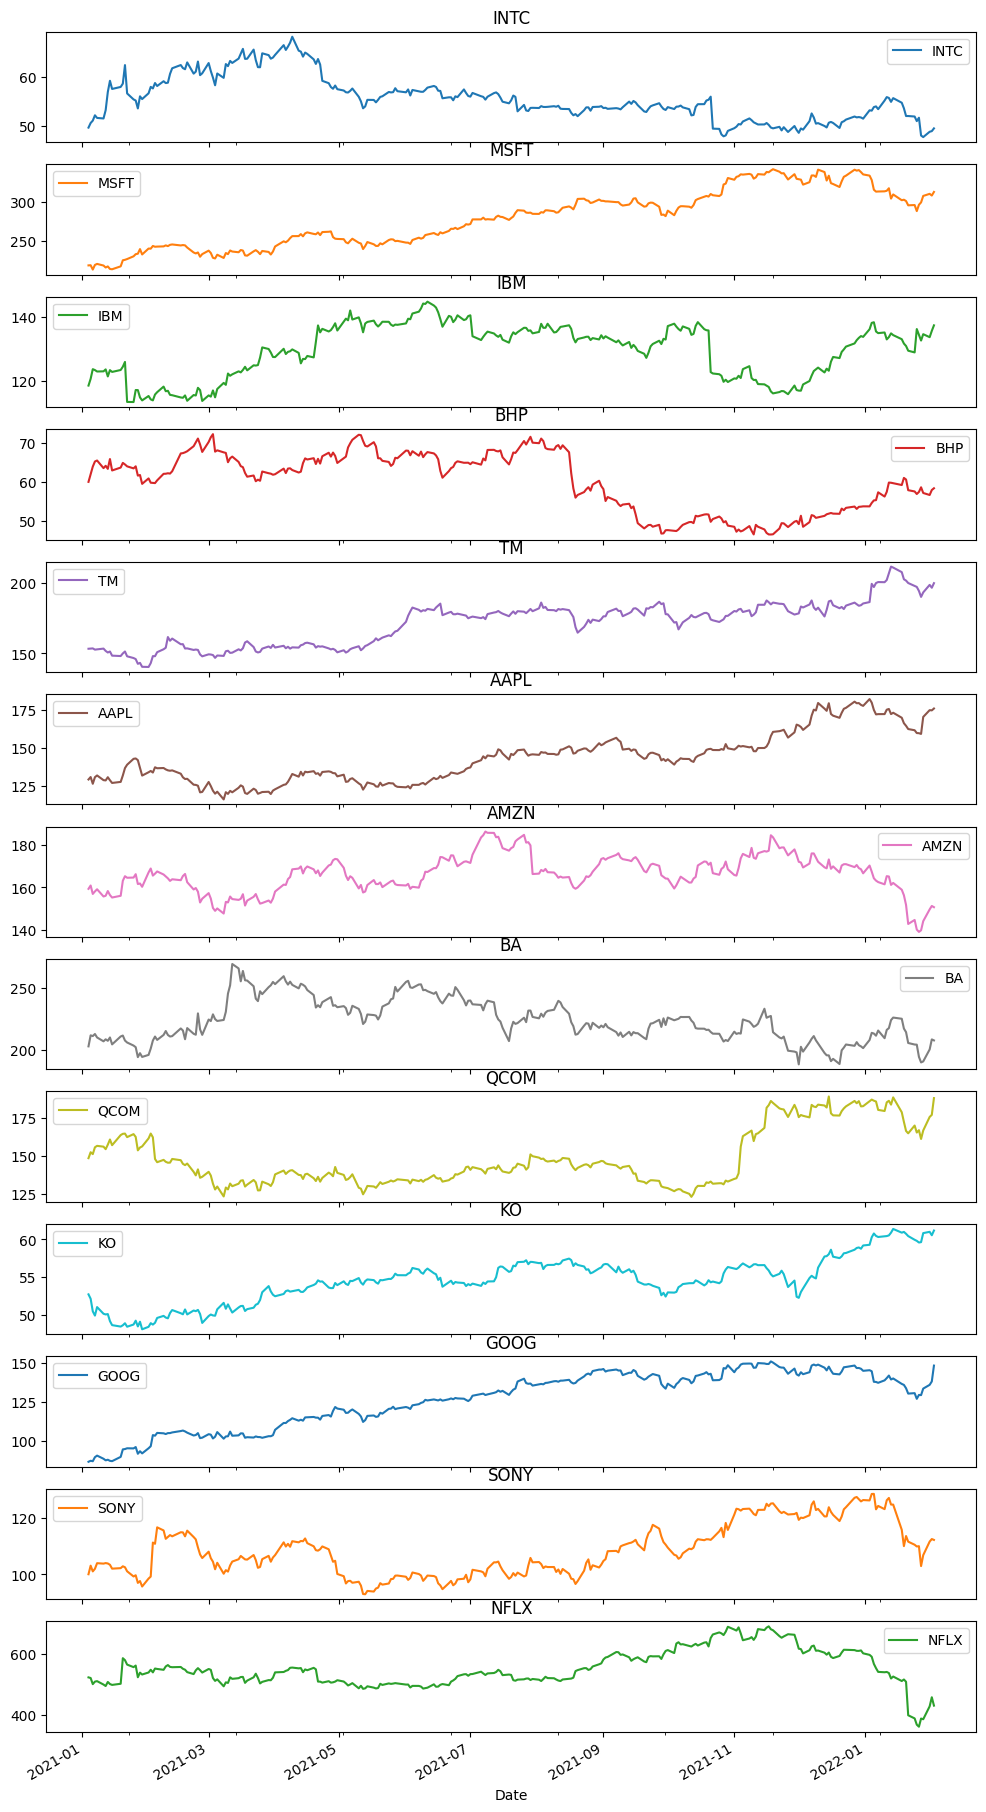

In [36]:
ticker.plot(title=ticker_list,subplots=True,figsize=(12,25))
#plt.show()

<AxesSubplot:title={'center':'Prices'}, xlabel='Date'>

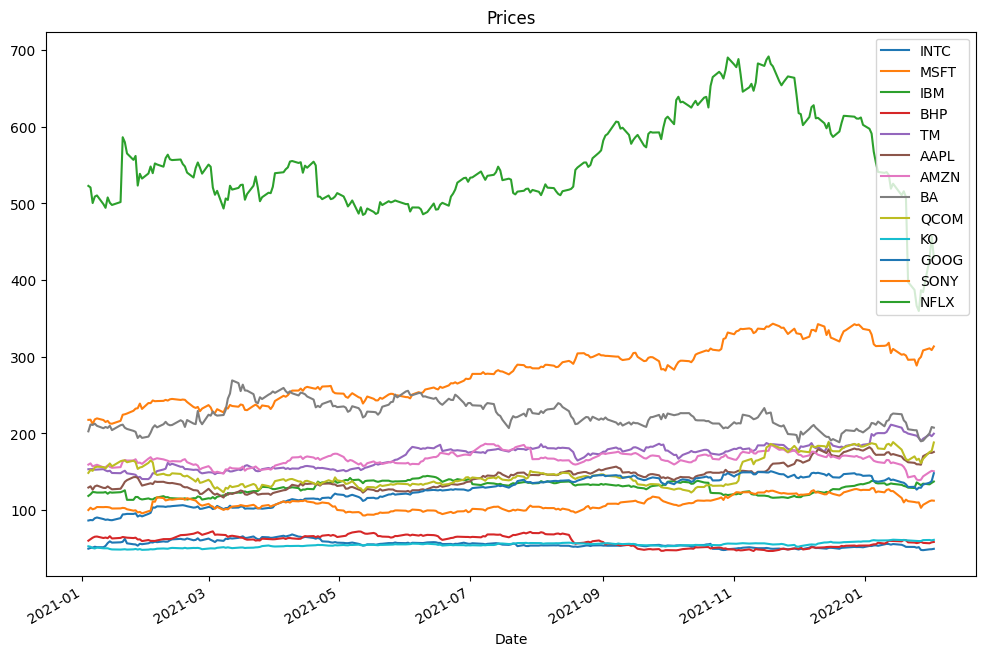

In [37]:
#ticker.plot(title=ticker_list,subplots=False,figsize=(12,8)) # This line of code doesn't work very well. Why?
ticker.plot(title='Prices',subplots=False,figsize=(12,8)) 

# Note the change in figure size above

What is wrong with the picture above? How useful do you think it is for comparing stock performance?

Let's try plotting returns instead to see if we can get more insight...

<AxesSubplot:title={'center':'Returns'}, xlabel='Date'>

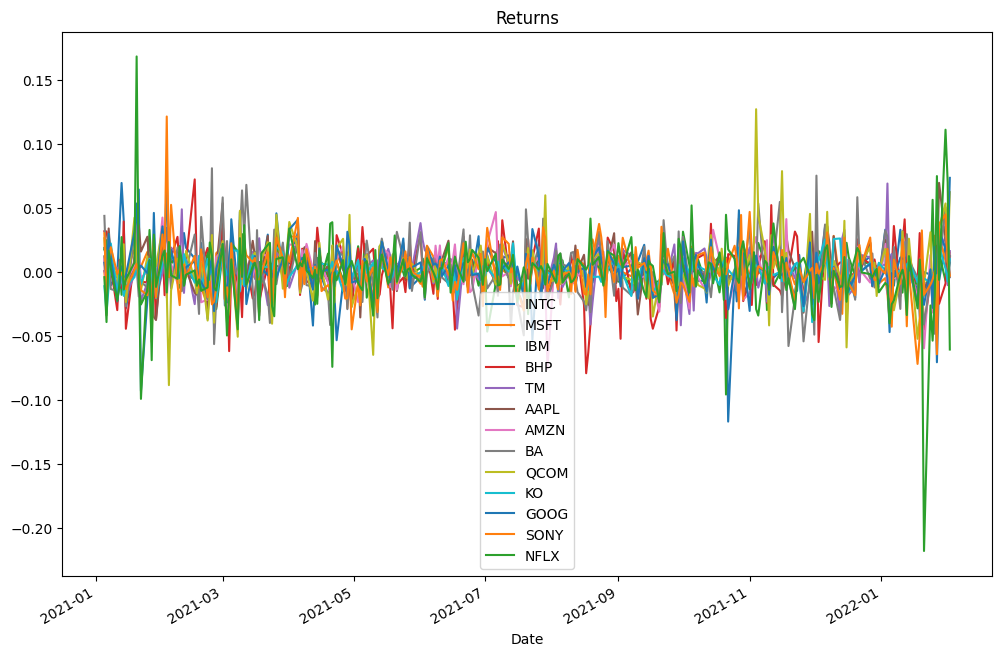

In [38]:
ret = ticker.pct_change()
ret.plot(title='Returns',figsize=(12,8))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

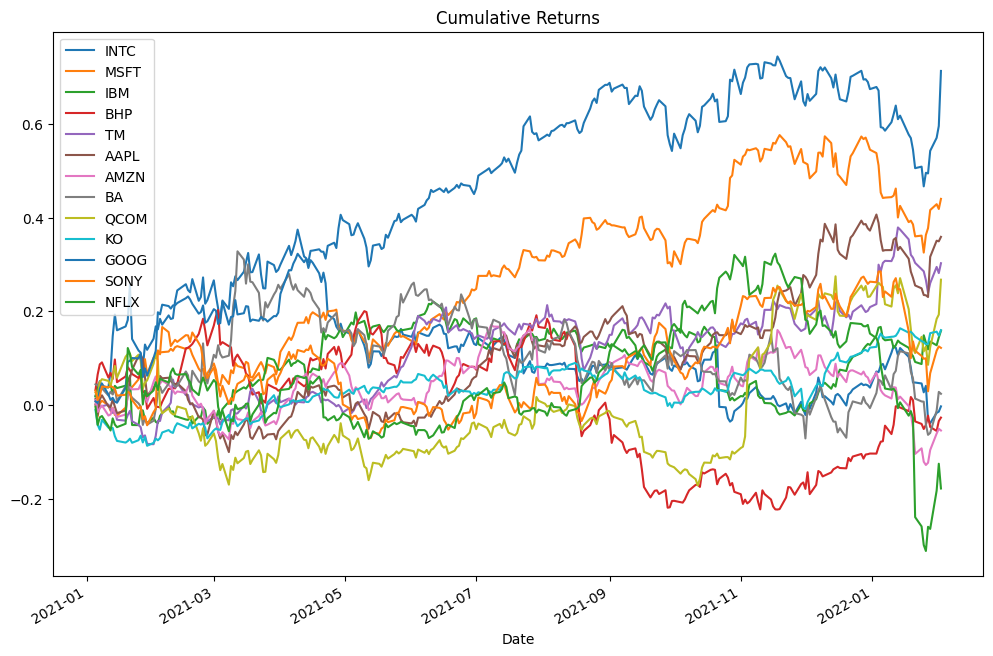

In [39]:
((1 + ret).cumprod() - 1).plot(title='Cumulative Returns',figsize=(12,8))

In [40]:
type(ticker)

pandas.core.frame.DataFrame

In [41]:
isinstance(ticker,pd.DataFrame)

True

In [42]:
def pdPlotReturns(x):
    if isinstance(x,pd.DataFrame):
        ret = ticker.pct_change()
        ((1 + ret).cumprod() - 1).plot(title='Cumulative Returns',figsize=(12,8))
    else:
        print(f'The variable provided by the user is of type {type(x)} but it should be Pandas DataFrame.')   


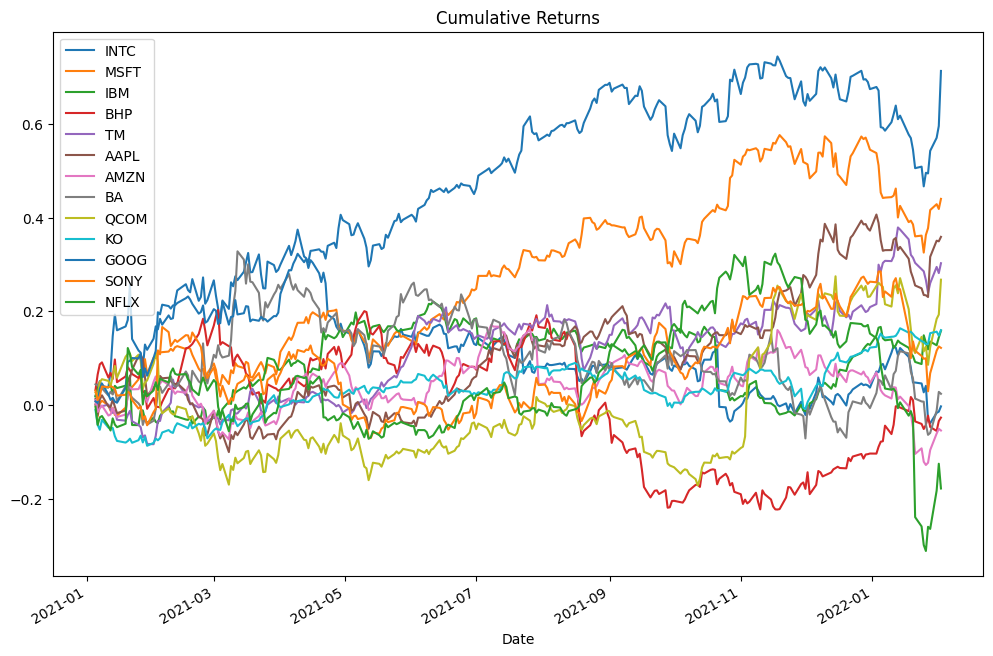

In [43]:
pdPlotReturns(ticker)

The time period is not sufficient to compare long-run performance among the stocks we selected. Let's try to extend our time window:

In [44]:
# Recall our previously defined function:
ticker = read_data(ticker_list)
ticker

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SONY,NFLX
Date,,,,,,,,,,,,,
2021-01-04 00:00:00-05:00,49.669998,217.690002,118.489487,60.080284,153.289993,129.410004,159.331497,202.720001,148.500000,52.759998,86.412003,100.070000,522.859985
2021-01-05 00:00:00-05:00,50.610001,217.899994,120.592735,61.998215,153.399994,131.009995,160.925507,211.630005,152.429993,52.180000,87.045998,103.110001,520.799988
2021-01-06 00:00:00-05:00,51.099998,212.250000,123.604210,63.969669,153.529999,126.599998,156.919006,211.029999,151.190002,50.520000,86.764503,101.080002,500.489990
2021-01-07 00:00:00-05:00,52.189999,218.289993,123.317398,65.280998,152.669998,130.919998,158.108002,212.710007,155.699997,49.959999,89.362503,102.000000,508.890015
2021-01-08 00:00:00-05:00,51.650002,219.619995,122.877632,65.530777,152.850006,132.050003,159.134995,209.899994,156.639999,51.080002,90.360497,103.989998,510.399994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27 00:00:00-05:00,48.049999,299.839996,132.520004,58.697590,189.960007,159.220001,139.637497,189.750000,161.199997,59.650002,129.121002,102.970001,386.700012
2022-01-28 00:00:00-05:00,47.730000,308.260010,134.500000,57.243534,193.130005,170.330002,143.977997,190.570007,166.809998,60.840000,133.289505,106.839996,384.359985
2022-01-31 00:00:00-05:00,48.820000,310.980011,133.570007,56.735058,198.449997,174.779999,149.573502,200.240005,175.759995,61.009998,135.698502,111.660004,427.140015


In [45]:
# Let's get more data
ticker = read_data(ticker_list, start=dt.datetime(2016, 1, 2), end=dt.datetime(2023, 2, 3))
ticker

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SONY,NFLX
Date,,,,,,,,,,,,,
2016-01-04 00:00:00-05:00,33.990002,54.799999,129.971313,22.729706,121.459999,26.337500,31.849501,140.500000,50.119999,42.400002,37.091999,24.730000,109.959999
2016-01-05 00:00:00-05:00,33.830002,55.049999,129.875717,22.542374,121.139999,25.677500,31.689501,141.070007,49.139999,42.549999,37.129002,25.469999,107.660004
2016-01-06 00:00:00-05:00,33.080002,54.049999,129.225616,21.195360,118.379997,25.174999,31.632500,138.830002,48.639999,42.320000,37.181000,23.629999,117.680000
2016-01-07 00:00:00-05:00,31.840000,52.169998,127.017204,20.035683,115.570000,24.112499,30.396999,133.009995,46.139999,41.619999,36.319500,23.270000,114.559998
2016-01-08 00:00:00-05:00,31.510000,52.330002,125.841301,19.589651,113.059998,24.240000,30.352501,129.990005,45.880001,41.509998,35.723499,23.000000,111.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27 00:00:00-05:00,28.160000,248.160004,134.389999,69.879997,147.160004,145.929993,102.239998,211.169998,133.399994,60.490002,100.709999,90.610001,360.769989
2023-01-30 00:00:00-05:00,27.950001,242.710007,135.300003,69.669998,145.179993,143.000000,100.550003,209.669998,131.630005,60.639999,97.949997,89.330002,353.109985
2023-01-31 00:00:00-05:00,28.260000,247.809998,134.729996,70.150002,147.110001,144.289993,103.129997,213.000000,133.210007,61.320000,99.870003,89.459999,353.859985


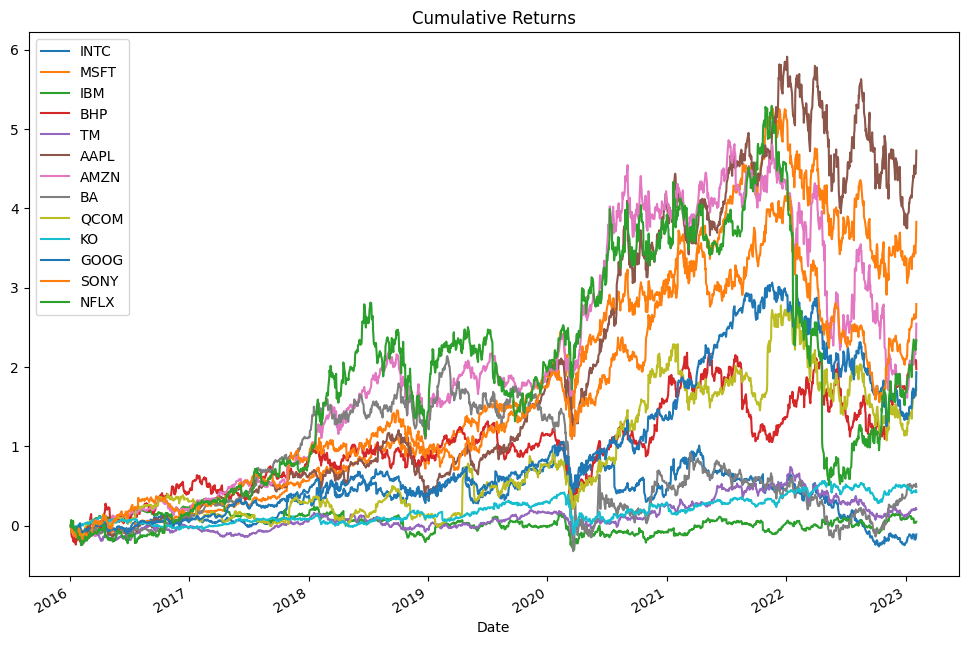

In [46]:
pdPlotReturns(ticker)

> ### <font color=red>Homework</font>:
> * Modify `pdPlotReturns()` function above to allow for cumulative returns to be returned as an output in addition to displaying a plot. 

## Dealing with missing data

### Load example data
Note the possible options:
1. Loading data from file outside of current directory.
2. Loading data directly from the web via link to file.

In [47]:
#data = pd.read_csv("../../Data/nba.csv") # note relative path specification
data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")
data.head(20)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


In [48]:
# removing null values to avoid errors  
data.dropna(inplace = False)  # What does "inplace=False" mean?
data.head(20)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


In [49]:
# removing null values to avoid errors  
data.dropna(inplace = True)  # What does "inplace=True" mean?
  
# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = data.describe(percentiles = perc, include = include) 
  
# display 
desc 

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,364,364,364.000000,364,364.000000,364,364.000000,364,3.640000e+02
unique,364,30,NaN,5,NaN,17,NaN,115,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,6-9,NaN,Kentucky,NaN
freq,1,16,NaN,87,NaN,49,NaN,22,NaN
mean,NaN,NaN,16.829670,NaN,26.615385,NaN,219.785714,NaN,4.620311e+06
std,NaN,NaN,14.994162,NaN,4.233591,NaN,24.793099,NaN,5.119716e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,5.572200e+04
20%,NaN,NaN,4.000000,NaN,23.000000,NaN,195.000000,NaN,9.472760e+05
40%,NaN,NaN,9.000000,NaN,25.000000,NaN,212.000000,NaN,1.638754e+06
50%,NaN,NaN,12.000000,NaN,26.000000,NaN,220.000000,NaN,2.515440e+06


As shown in the output, statistical description of dataframe was returned with the respective passed percentiles. For the columns with strings (permitted to be included via `Object` data type), `NaN` was returned for numeric operations.

In [50]:
data.describe(percentiles = perc, include = ['float', 'int'] )

,Number,Age,Weight,Salary
count,364.000000,364.000000,364.000000,3.640000e+02
mean,16.829670,26.615385,219.785714,4.620311e+06
std,14.994162,4.233591,24.793099,5.119716e+06
min,0.000000,19.000000,161.000000,5.572200e+04
20%,4.000000,23.000000,195.000000,9.472760e+05
40%,9.000000,25.000000,212.000000,1.638754e+06
50%,12.000000,26.000000,220.000000,2.515440e+06
60%,17.000000,27.000000,228.000000,3.429934e+06
80%,30.000000,30.000000,242.400000,7.838202e+06
max,99.000000,40.000000,279.000000,2.287500e+07


In [51]:
data["Name"].describe() 

count               364
unique              364
top       Avery Bradley
freq                  1
Name: Name, dtype: object

### Explore your data
In the example above, we were very quick to drop missing data. Lets explore how much data did we lose.

In [52]:
# reload data
data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv")

In [53]:
# Number of missing entries by variable name
data.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

Now count the percentage of missing values for each column, simply by dividing the previous result by the length of the dataset (`len(df)`) and multiplying per 100.

In [54]:
data.isna().sum()/len(data)*100

Name         0.218341
Team         0.218341
Number       0.218341
Position     0.218341
Age          0.218341
Height       0.218341
Weight       0.218341
College     18.558952
Salary       2.620087
dtype: float64

> ### <font color=red>Homework</font>: Format the output of the above line so that it
> - displays only 2 decimal points
> - (more challenging) also add `%` symbol at the end of each number to denote percentage.

When dealing with missing values, different alternatives can be applied:
- check the source, for example by contacting the data source to correct the missing values
    - a problem with missing values could also occur if you are loading data from a text file in different text encoding standard or language. Letters with accent grave, apostrophes, carets, tildes may present some issues
- drop missing values
- replace the missing value with a value
- leave the missing value as it is

**Droping missing values** can be one of the following alternatives:

- remove rows having missing values
- remove the whole column containing missing values 

We can use the `dropna()` by specifying the axis to be considered. If we set `axis = 0` (by apply the function `data.dropna(axis=0)`) we drop the entire row, if we set `axis = 1` we drop the whole column (apply the function `data.dropna(axis=1)`. 

**<font color=blue>Important:</font>** However, removed values are not applied to the original dataframe, but only to the result. We can use the argument `inplace=True` in order to store changes in the original dataframe `data`. 

In [55]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [56]:
data.dropna(axis=0)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


In [57]:
data.dropna(axis=1)

""
0
1
2
3
4
...
453
454
455
456


In [58]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [59]:
data.dropna(axis=0,inplace=True)

In [60]:
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


> ## <font color=red>Homework (just for fun if you have time this weekend):</font> 
The [link](https://towardsdatascience.com/how-to-extract-text-from-pdf-245482a96de7) contains reviews on some Python libraries that claim to read text directly from PDF files. Pick one or try a few, see how it perfroms. I have not yet tested this functionality in Python, but have been using it through other programming languages. 
`pdfPlumber` looks promissing and Kenny said "`PyMuPDF` works for me. But, its syntax doesn't feel pythonic to me. `-m pip install PyMuPDF` then `import fitz` to start."